In [1]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
import pickle
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Default dimensions 
img_width, img_height = 224, 224 
output_file_name = 'CrisisMMD_v2.0/multimodal_bert_vgg16.npy'
#Create a bottleneck file
top_model_weights_path = "drive/MyDrive/Colab Notebooks/bottleneck_fc_model.h5"
# loading up our datasets
train_data_dir = 'drive/MyDrive/Colab Notebooks/train2/'
validation_data_dir = 'drive/MyDrive/Colab Notebooks/val2/'
 
# number of epochs to train top model 
epochs = 7 #this has been changed after multiple model run 
# batch size used by flow_from_directory and predict_generator 
batch_size = 50 

In [3]:
#Loading vgg16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
#For Training data
start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save("bottleneck_features_train.npy", bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
with open(output_file_name, 'wb') as handle:
  pickle.dump(bottleneck_features_train, handle, protocol=pickle.HIGHEST_PROTOCOL)
print ("Time: ", elapsed)

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/train2.npy', 'rb') as handle:
        bottleneck_features_train = pickle.load(handle)
np.save('bottleneck_features_train.npy', bottleneck_features_train) 

In [5]:
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 13608 images belonging to 8 classes.


In [ ]:
#Now for validation
start = datetime.datetime.now()
generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_validation_samples = len(generator.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict_generator(  
     generator, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 
end= datetime.datetime.now()
elapsed= end-start
output_file = 'CrisisMMD_v2.0/multimodal_val_vgg16_bert.npy'
with open(output_file, 'wb') as handle:
  pickle.dump(bottleneck_features_validation, handle, protocol=pickle.HIGHEST_PROTOCOL)
print ('Time: ', elapsed)

In [6]:
with open('/content/drive/MyDrive/Colab Notebooks/val2.npy', 'rb') as handle:
        bottleneck_features_validation = pickle.load(handle)
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

In [7]:
#validation data
generator_top = datagen.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 2237 images belonging to 8 classes.


In [8]:
with open('/content/drive/MyDrive/Colab Notebooks/test2.npy', 'rb') as handle:
        bottleneck_features_test = pickle.load(handle)
np.save('bottleneck_features_test.npy', bottleneck_features_test) 

In [9]:
#test data
test_data_dir='/content/drive/MyDrive/Colab Notebooks/test2'
generator_top = datagen.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 2237 images belonging to 8 classes.


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import tensorflow_hub
import os


import nltk 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report


import re
import gensim
import seaborn
import random
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install bert-for-tf2
import bert
from bert.tokenization.bert_tokenization import FullTokenizer
import tensorflow_hub
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = tensorflow_hub.KerasLayer(module_url, trainable=True)

     |████████████████████████████████| 51kB 4.8MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-cp37-none-any.whl size=30535 sha256=d8b096339bdc9da14b71c61700b6176f0a6d98dcda2839fca4030138aff397a4
  Stored in directory: /root/.cache/pip/wheels/a1/04/ee/347bd9f5b821b637c76411d280271a857aece00358896a230f
  Created wheel for py-params: filename=py_params-0.10.2-cp37-none-any.whl size=7912 sha256=65c787f8eae8bf45d831cea78a03a922e2b95e6dc3075c4bffc470f6deb63530
  Stored in directory: /root/.cache/pip/wheels/d0/4a/70/ff12450229ff1955abf01f365051d4faae1c20aef53ab4cf09
  Created wheel for params-flow: filename=params_flow-0.8.2-cp37-none-any.whl size=19472 sha256=e4a102f0751d119f1fc1286a384aacdfc8b62315e74d3a1f127c35c2a0f98947
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [11]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_humanitarian_text_img_train.tsv", sep='\t')
df_train.shape

(13608, 9)

In [12]:
BATCHSIZE=df_train.shape[0]

In [13]:
df_train.columns

Index(['event_name', 'tweet_id', 'image_id', 'tweet_text', 'image', 'label',
       'label_text', 'label_image', 'label_text_image'],
      dtype='object')

In [14]:
df_train['label'].value_counts()

not_humanitarian                          5260
other_relevant_information                3294
rescue_volunteering_or_donation_effort    2323
infrastructure_and_utility_damage         1905
affected_individuals                       424
injured_or_dead_people                     244
vehicle_damage                             134
missing_or_found_people                     24
Name: label, dtype: int64

In [15]:
df1=df_train[df_train['label']=='affected_individuals']
df2=df_train[df_train['label']=='infrastructure_and_utility_damage']
df3=df_train[df_train['label']=='injured_or_dead_people']
df4=df_train[df_train['label']=='missing_or_found_people']
df5=df_train[df_train['label']=='not_humanitarian']
df6=df_train[df_train['label']=='other_relevant_information']
df7=df_train[df_train['label']=='rescue_volunteering_or_donation_effort']
df8=df_train[df_train['label']=='vehicle_damage']
df_train=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df_train.shape

(13608, 9)

In [16]:
df_val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_humanitarian_text_img_dev.tsv", sep='\t')
df_val.shape

(2237, 9)

In [17]:
df11=df_val[df_val['label']=='affected_individuals']
df22=df_val[df_val['label']=='infrastructure_and_utility_damage']
df33=df_val[df_val['label']=='injured_or_dead_people']
df44=df_val[df_val['label']=='missing_or_found_people']
df55=df_val[df_val['label']=='not_humanitarian']
df66=df_val[df_val['label']=='other_relevant_information']
df77=df_val[df_val['label']=='rescue_volunteering_or_donation_effort']
df88=df_val[df_val['label']=='vehicle_damage']
df_val=pd.concat([df11,df22,df33,df44,df55,df66,df77,df88])
df_val.shape

(2237, 9)

In [18]:
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CrisisMMD_v2.0/crisismmd_datasplit_all/task_humanitarian_text_img_test.tsv", sep='\t')
df_test.shape

(2237, 9)

In [20]:
df_test.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image
0,hurricane_harvey,905952332923338752,905952332923338752_0,.@Lendio has a great event tomorrow for both #...,data_image/hurricane_harvey/8_9_2017/905952332...,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,rescue_volunteering_or_donation_effort,Positive
1,mexico_earthquake,912022130396672000,912022130396672000_0,Now @ReposadoBar also Carlo surf band at 8pm #...,data_image/mexico_earthquake/24_9_2017/9120221...,not_humanitarian,not_humanitarian,not_humanitarian,Positive
2,mexico_earthquake,910700764808564736,910700764808564736_0,"Earthquake in Mexico rocks PH Embassy, no Fili...",data_image/mexico_earthquake/21_9_2017/9107007...,infrastructure_and_utility_damage,other_relevant_information,infrastructure_and_utility_damage,Negative
3,hurricane_maria,927758858776465408,927758858776465408_0,Guaynabo resident Efrain Diaz stands by a brid...,data_image/hurricane_maria/7_11_2017/927758858...,infrastructure_and_utility_damage,infrastructure_and_utility_damage,infrastructure_and_utility_damage,Positive
4,hurricane_harvey,907654309587779584,907654309587779584_0,"After Harvey, Irma Leaves Its Own Trail of Des...",data_image/hurricane_harvey/12_9_2017/90765430...,other_relevant_information,other_relevant_information,other_relevant_information,Positive


In [19]:
df12=df_test[df_test['label']=='affected_individuals']
df23=df_test[df_test['label']=='infrastructure_and_utility_damage']
df34=df_test[df_test['label']=='injured_or_dead_people']
df45=df_test[df_test['label']=='missing_or_found_people']
df56=df_test[df_test['label']=='not_humanitarian']
df67=df_test[df_test['label']=='other_relevant_information']
df78=df_test[df_test['label']=='rescue_volunteering_or_donation_effort']
df89=df_test[df_test['label']=='vehicle_damage']
df_test=pd.concat([df12,df23,df34,df45,df56,df67,df78,df89])
df_test.shape

(2237, 9)

In [ ]:
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)
df_val= df_val.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)
df_test= df_test.drop(['tweet_id', 'image_id','image', 'label_text','label_image'], axis=1)

In [20]:
def preprocess(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [21]:
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
df_val.tweet_text = df_val.tweet_text.apply(preprocess)
df_test.tweet_text = df_test.tweet_text.apply(preprocess)

In [ ]:
df_train.reset_index(inplace = True)
df_val.reset_index(inplace = True)
df_test.reset_index(inplace = True)

In [ ]:
vocabularyfile = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocabularyfile, do_lower_case)

In [ ]:
def embedding(string):
    string = tokenizer.tokenize(string)
            
    string = string[:maxstringlength-2]
    input_sequence = ["[CLS]"] + string + ["[SEP]"]
    pad_len = maxstringlength - len(input_sequence)

    tokens = tokenizer.convert_tokens_to_ids(input_sequence)
    tokens += [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * maxstringlength
    return tokens, pad_masks, segment_ids

In [ ]:
def formatting(data):
    tokenlist = []
    masklist = []
    segmentlist = []
    for i in range(data.shape[0]):
        tokenlist.append(data[i][0])
        masklist.append(data[i][1])
        segmentlist.append(data[i][2])
    return np.array(tokenlist), np.array(masklist), np.array(segmentlist)

In [ ]:
maxstringlength = 22
trainingdata = df_train.tweet_text.apply(embedding)
valdata = df_val.tweet_text.apply(embedding)

X_train = formatting(trainingdata)
X_val = formatting(valdata)

testdata=df_test.tweet_text.apply(embedding)
X_test=formatting(testdata)

In [ ]:
noofcategories = df_train["label"].nunique()
noofcategories

8

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
import warnings
import datetime
import optparse
import os, errno
import keras.callbacks as callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, CSVLogger, TensorBoard
from gensim.models import KeyedVectors
from keras.layers import Input, Activation, Add, Concatenate, Dropout
from keras.models import load_model
from keras.layers import concatenate
from time import time
import pickle
from keras.layers.normalization import BatchNormalization
import keras
from keras.applications.resnet50 import ResNet50

In [ ]:
def create_cnn():
   
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:])) 
    model.add(Dense(32, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [ ]:
def create_bert(bert_layer, noofcategories, maxstringlength=22):
    tokens = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="tokens")
    masks = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="masks")
    segments = tf.keras.Input(shape=(maxstringlength,), dtype=tf.int32, name="segments")

    pooled_output, sequence_output = bert_layer([tokens, masks, segments])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.4)(net)
    out = tf.keras.layers.Dense(32, activation='relu')(net)
    
    model = tf.keras.models.Model(inputs=[tokens, masks, segments], outputs=out)
    #model.compile(tf.keras.optimizers.Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
bert_model = create_bert(bert_layer, noofcategories, maxstringlength=22)
cnn = create_cnn()
combinedInput = concatenate([bert_model.output, cnn.output])

In [ ]:
# The final fully-connected layer head 
x = Dense(16, activation="relu")(combinedInput)
x = Dense(noofcategories, activation="softmax")(x)

In [ ]:
# The final model accepts numerical data on the BERT input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bert_model.input, cnn.input], outputs=x)

In [ ]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
 
# train the model
history = model1.fit([X_train, train_data], train_labels, validation_data=([X_val, validation_data], validation_labels), epochs=5, batch_size=4)
#model1_history = model1.fit([trainAttrX, trainImagesX], trainY, validation_data=([testAttrX, testImagesX], testY), epochs=5, batch_size=10)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

Epoch 1/5
1459/3402 [===========>..................] - ETA: 2:52:28 - loss: 1.6978 - acc: 0.3589

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def cnn_evaluation(model, history,test_features, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_pred = np.round(model.predict([test_features, test_images]))
    
    target_names = ['Informative', 'Non-Informative']
    classification_metrics = metrics.classification_report(test_labels, y_pred, target_names=target_names )
    print(classification_metrics)
    categorical_test_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
    categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
    cm= confusion_matrix(categorical_test_labels, categorical_preds)
    plot_confusion_matrix(cm, target_names)

In [ ]:
cnn_evaluation(model1, history, X_test, test_data,test_labels, class_names=None, model_name=None)

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()


In [ ]:
Now Using BiLSTM

In [22]:
import numpy as np
np.random.seed(1337)  # for reproducibility

import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import sys
from sklearn import preprocessing
import re
from collections import Counter
import random
random.seed(1337)
import tensorflow as tf
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
#print(stop_words)

text_cleaning_re = "@\S+|https?:\S+|http?:\S+|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if (token not in stop_words and (len(token)!=1) and token not in ["rt","RT"]):
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
        #The join() method takes all items in an iterable and joins them into one string.
  return " ".join(tokens)

In [24]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df_train.tweet_text)    #creates word_index dictionary based on frequency of the word

vocabularysize = len(tokenizer.word_index) + 1
print("Total words", vocabularysize)
xtrain_sequences = tokenizer.texts_to_sequences(df_train.tweet_text)

Total words 18457


In [25]:
xtrain_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtrain_sequences, padding="post", maxlen=25)

In [26]:
xval_sequences = tokenizer.texts_to_sequences(df_val.tweet_text)
xtest_sequences = tokenizer.texts_to_sequences(df_test.tweet_text)

In [27]:
xval_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xval_sequences, padding="post", maxlen=25)
xtest_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(xtest_sequences, padding="post", maxlen=25)

In [30]:
# prepare input data
def One_Hot_Encoding(Y_train, Y_val, Y_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(Y_train)
    categoryarray=ohe.categories_
    Y_train_enc = ohe.transform(Y_train)
    Y_test_enc = ohe.transform(Y_test)
    Y_val_enc = ohe.transform(Y_val)
    return categoryarray, Y_train_enc, Y_val_enc, Y_test_enc

In [31]:
categoryarray, ytrain, yval, ytest = One_Hot_Encoding(np.array(df_train.label_text.to_list()).reshape(-1,1), np.array(df_val.label_text.to_list()).reshape(-1,1), np.array(df_test.label_text.to_list()).reshape(-1,1))       # Neural networks expects input values to be numerical.
ytrain = ytrain.toarray()
yval = yval.toarray()
ytest = ytest.toarray()
categoryarray

[array(['affected_individuals', 'infrastructure_and_utility_damage',
        'injured_or_dead_people', 'missing_or_found_people',
        'not_humanitarian', 'other_relevant_information',
        'rescue_volunteering_or_donation_effort', 'vehicle_damage'],
       dtype='<U38')]

In [33]:
ytrain

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
#Train Embeddings
import pandas as pd
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/task_informative_text_img_train.tsv',sep='\t')
df_train = df_train.drop_duplicates(subset="tweet_id")
df_train= df_train.drop(['tweet_id', 'image_id','image', 'label','label_image'], axis=1)
df_train = df_train.dropna()
df_train.tweet_text = df_train.tweet_text.apply(preprocess)
documents = [_text.split() for _text in df_train.tweet_text]

In [29]:
import multiprocessing
import gensim
EMBEDDINGLENGTH=300
w2v_model = gensim.models.Word2Vec(size=EMBEDDINGLENGTH, 
                                   window=2, 
                                   min_count=1,
                                   sg=1)

In [30]:
w2v_model.save("w2v_model.model")
w2v_model.build_vocab(documents)
wordvectors = w2v_model.wv    #keyed vector object
#print("Vocab size:", len(wordvectors))

In [31]:
w2v_model.train(documents, total_examples=len(documents), epochs=50)

(4359277, 4994550)

In [32]:
vocabularysize=18457
embedding_matrix = np.zeros((vocabularysize, EMBEDDINGLENGTH))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)


(18457, 300)


In [37]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
import warnings
import datetime
import optparse
import os, errno
import keras.callbacks as callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler, CSVLogger, TensorBoard
from gensim.models import KeyedVectors
from keras.layers import Input, Activation, Add, Concatenate, Dropout
from keras.models import load_model
from keras.layers import concatenate
from time import time
import pickle
from keras.layers.normalization import BatchNormalization
import keras
from keras.applications.resnet50 import ResNet50

# Taking Average of Both Image and Text score

In [40]:
embedding_layer = tf.keras.layers.Embedding(input_dim=vocabularysize,
                                            output_dim=EMBEDDINGLENGTH,
                                            weights=[embedding_matrix],
                                            input_length=25,
                                            trainable=False)
model = tf.keras.models.Sequential()
model.add(embedding_layer)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
#model.add(tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           5537100   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 256)           439296    
_________________________________________________________________
dropout (Dropout)            (None, 25, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 8)                 2056      
Total params: 6,372,692
Trainable params: 835,592
Non-trainable params: 5,537,100
_________________________________________________________________


In [41]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(5e-4), metrics=["accuracy"])

In [42]:
H = model.fit(xtrain_padded_sequences, ytrain, batch_size=50, epochs=10, validation_data=(xval_padded_sequences,yval), verbose=1)

Epoch 1/10
273/273 [==============================] - 68s 228ms/step - loss: 1.2421 - accuracy: 0.5441 - val_loss: 0.9340 - val_accuracy: 0.6531
Epoch 2/10
273/273 [==============================] - 61s 222ms/step - loss: 0.9132 - accuracy: 0.6581 - val_loss: 0.8994 - val_accuracy: 0.6634
Epoch 3/10
273/273 [==============================] - 61s 223ms/step - loss: 0.8602 - accuracy: 0.6795 - val_loss: 0.8852 - val_accuracy: 0.6714
Epoch 4/10
273/273 [==============================] - 61s 225ms/step - loss: 0.8275 - accuracy: 0.6935 - val_loss: 0.8768 - val_accuracy: 0.6647
Epoch 5/10
273/273 [==============================] - 61s 222ms/step - loss: 0.7889 - accuracy: 0.7004 - val_loss: 0.9115 - val_accuracy: 0.6585
Epoch 6/10
273/273 [==============================] - 60s 221ms/step - loss: 0.7632 - accuracy: 0.7024 - val_loss: 0.8792 - val_accuracy: 0.6764
Epoch 7/10
273/273 [==============================] - 61s 223ms/step - loss: 0.7093 - accuracy: 0.7330 - val_loss: 0.8867 - val_ac

In [43]:
len(validation_data)

2237

In [46]:
validation_labels[0].size

8

In [45]:
start = datetime.datetime.now()
model1 = Sequential() 
model1.add(Flatten(input_shape=train_data.shape[1:])) 
model1.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model1.add(Dropout(0.4)) 
model1.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
#model1.add(Dropout(0.3)) 
model1.add(Dense(8, activation="softmax"))
model1.compile(loss="categorical_crossentropy",
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])
history = model1.fit(train_data, train_labels, 
   epochs=6,
   batch_size=50, 
   validation_data=(validation_data, validation_labels))
(eval_loss, eval_accuracy) = model1.evaluate( 
    validation_data, validation_labels, batch_size=batch_size,     verbose=1)
print('[INFO] accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Epoch 1/6
273/273 [==============================] - 9s 30ms/step - loss: 1.2242 - acc: 0.5488 - val_loss: 1.0416 - val_acc: 0.6245
Epoch 2/6
273/273 [==============================] - 8s 29ms/step - loss: 0.9378 - acc: 0.6560 - val_loss: 0.9428 - val_acc: 0.6527
Epoch 3/6
273/273 [==============================] - 8s 29ms/step - loss: 0.8471 - acc: 0.6826 - val_loss: 1.0950 - val_acc: 0.6299
Epoch 4/6
273/273 [==============================] - 8s 29ms/step - loss: 0.7792 - acc: 0.7082 - val_loss: 0.9383 - val_acc: 0.6536
Epoch 5/6
273/273 [==============================] - 8s 29ms/step - loss: 0.7088 - acc: 0.7321 - val_loss: 1.0431 - val_acc: 0.6080
Epoch 6/6
45/45 [==============================] - 0s 6ms/step - loss: 0.9706 - acc: 0.6661
[INFO] accuracy: 66.61%
[INFO] Loss: 0.9706093668937683
Time:  0:00:48.346639


In [66]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               2508900   
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 408       
Total params: 2,514,358
Trainable params: 2,514,358
Non-trainable params: 0
_________________________________________________________________


In [59]:
score = model.predict(xtest_padded_sequences)    # Score is the probability output of the last layer
score2 = model1.predict(test_data)

In [48]:
len(score)

2237

In [49]:
len(score2)

2237

In [66]:
score

array([[0.00838912, 0.05869974, 0.00092103, ..., 0.20095864, 0.02818198,
        0.00316942],
       [0.01156795, 0.06190669, 0.00061581, ..., 0.34746075, 0.0238903 ,
        0.00303438],
       [0.05538348, 0.07051464, 0.00443063, ..., 0.12214995, 0.49298176,
        0.00777199],
       ...,
       [0.01768394, 0.05019472, 0.00158926, ..., 0.0842628 , 0.09224217,
        0.00214106],
       [0.03339658, 0.33930376, 0.00210297, ..., 0.20977773, 0.24943075,
        0.01637504],
       [0.00881831, 0.11998033, 0.00120825, ..., 0.3159242 , 0.0165193 ,
        0.00758771]], dtype=float32)

In [67]:
score2

array([[8.99979472e-02, 2.03916460e-01, 3.53104509e-02, ...,
        1.17980346e-01, 2.46255368e-01, 2.22637635e-02],
       [2.13562977e-02, 1.34088274e-03, 8.28739314e-04, ...,
        1.83825329e-01, 4.84734215e-02, 2.75987317e-04],
       [1.65136550e-02, 3.80621970e-01, 1.61718447e-02, ...,
        1.02223024e-01, 1.76474005e-01, 8.75499751e-03],
       ...,
       [2.86071990e-02, 1.40484601e-01, 2.02834848e-02, ...,
        1.51877239e-01, 1.62778214e-01, 1.52340503e-02],
       [3.43019031e-02, 5.85846364e-01, 3.76908444e-02, ...,
        1.51594371e-01, 4.35874723e-02, 1.14946418e-01],
       [1.13993727e-01, 2.97900677e-01, 3.67619917e-02, ...,
        1.11546539e-01, 2.37091795e-01, 2.72998028e-02]], dtype=float32)

# Taking below averages of two scores

In [60]:
pred=(score+score2)/2

In [51]:
pred

array([[3.4739384e-01, 1.8293569e-02, 2.0476196e-02, ..., 7.2186768e-02,
        9.5608294e-02, 1.3034953e-03],
       [1.3389874e-02, 4.2423233e-01, 8.2841958e-04, ..., 4.3928537e-01,
        1.9245528e-02, 9.4107387e-04],
       [1.7203465e-02, 3.3755951e-02, 4.9267253e-03, ..., 2.2678126e-02,
        6.6723686e-01, 4.4210663e-04],
       ...,
       [2.1273817e-03, 3.7731725e-01, 1.0040627e-03, ..., 5.4755379e-02,
        6.1608102e-02, 2.6553117e-03],
       [8.6053601e-03, 7.1654403e-01, 7.3152664e-04, ..., 6.1696373e-02,
        8.6143784e-02, 8.9775482e-03],
       [2.2105830e-02, 4.0562356e-01, 5.1286770e-03, ..., 2.3461966e-01,
        5.5604950e-02, 2.6833691e-02]], dtype=float32)

In [61]:
preds = np.round(pred,0)
preds 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
target_names = ['affective_individual', 'infrastucture_damage','injured_or_dead_people','missing_or_found_people','not_humantarian','other_relevant','rescue_volunteer','vehicle_damage']
classification_metrics = metrics.classification_report(test_labels,preds, target_names=target_names )
print(classification_metrics)

                         precision    recall  f1-score   support

   affective_individual       1.00      0.03      0.07        86
   infrastucture_damage       0.79      0.20      0.32       319
 injured_or_dead_people       0.00      0.00      0.00        41
missing_or_found_people       0.00      0.00      0.00         5
        not_humantarian       0.69      0.61      0.65       849
         other_relevant       0.82      0.37      0.51       578
       rescue_volunteer       0.65      0.44      0.52       340
         vehicle_damage       0.00      0.00      0.00        19

              micro avg       0.72      0.42      0.53      2237
              macro avg       0.50      0.21      0.26      2237
           weighted avg       0.73      0.42      0.51      2237
            samples avg       0.42      0.42      0.42      2237



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [65]:
target_names = ['affective_individual', 'infrastucture_damage','injured_or_dead_people','missing_or_found_people','not_humantarian','other_relevant','rescue_volunteer','vehicle_damage']
classification_metrics = metrics.classification_report(categorical_test_labels,categorical_preds, target_names=target_names )
print(classification_metrics)

                         precision    recall  f1-score   support

   affective_individual       0.07      0.77      0.13        86
   infrastucture_damage       0.79      0.20      0.32       319
 injured_or_dead_people       0.00      0.00      0.00        41
missing_or_found_people       0.00      0.00      0.00         5
        not_humantarian       0.69      0.61      0.65       849
         other_relevant       0.82      0.37      0.51       578
       rescue_volunteer       0.65      0.44      0.52       340
         vehicle_damage       0.00      0.00      0.00        19

               accuracy                           0.45      2237
              macro avg       0.38      0.30      0.27      2237
           weighted avg       0.69      0.45      0.51      2237



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


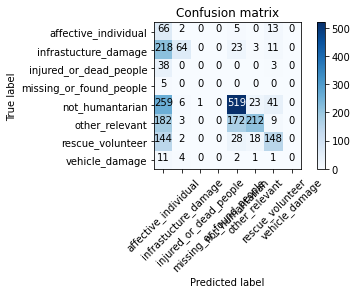

In [58]:
plot_confusion_matrix(confusion_matrix, target_names)

COTRAIN + CONCAT

In [38]:
def create_bilstm():
    embedding_layer = tf.keras.layers.Embedding(input_dim=vocabularysize,
                                            output_dim=EMBEDDINGLENGTH,
                                            weights=[embedding_matrix],
                                            input_length=25,
                                            trainable=False)
    model = Sequential()
    model.add(embedding_layer)
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    model.add(Dense(20,activation="relu"))
    return model

In [ ]:
def create_cnn():
  
    # Initialize the input shape and channel dimension, where the number of channels is the last dimension
    model = Sequential() 
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(tf.keras.layers.Dropout(0.4)) 
    model.add(Dense(20, activation=keras.layers.LeakyReLU(alpha=0.3))) 
 
    # Return the CNN
    return model        

In [ ]:
bilstm = create_bilstm()
cnn = create_cnn()
combinedInput = concatenate([bilstm.output, cnn.output])

In [39]:
# The final fully-connected layer 
x = Dense(12, activation="relu")(combinedInput)
#x = tf.keras.layers.Dropout(0.4)(x)
x = Dense(8, activation="softmax")(x)

In [40]:
# The final model accepts numerical data on the BiLSTM input and images on the CNN input, outputting a single value
model1 = Model(inputs=[bilstm.input, cnn.input], outputs=x)

In [42]:
from keras.optimizers import Adam, RMSprop
start = datetime.datetime.now()

# compile the model 
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model1.compile(loss="categorical_crossentropy", metrics=['acc'], optimizer=opt)
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='auto', patience=10, cooldown=1),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10)]
# train the model
history = model1.fit([xtrain_padded_sequences, train_data], train_labels, validation_data=([xval_padded_sequences, validation_data], validation_labels), epochs=5, batch_size=50,callbacks=callbacks)
 
end = datetime.datetime.now()
print("Time taken to run:", end-start)

Epoch 1/5
273/273 [==============================] - 85s 289ms/step - loss: 1.5409 - acc: 0.4718 - val_loss: 1.2225 - val_acc: 0.5244
Epoch 2/5
273/273 [==============================] - 77s 281ms/step - loss: 1.1461 - acc: 0.5777 - val_loss: 1.1708 - val_acc: 0.5691
Epoch 3/5
273/273 [==============================] - 76s 278ms/step - loss: 1.0467 - acc: 0.6151 - val_loss: 1.1262 - val_acc: 0.5798
Epoch 4/5
273/273 [==============================] - 77s 280ms/step - loss: 0.9709 - acc: 0.6387 - val_loss: 1.1224 - val_acc: 0.6013
Epoch 5/5
273/273 [==============================] - 76s 279ms/step - loss: 0.8880 - acc: 0.6814 - val_loss: 1.1047 - val_acc: 0.6097
Time taken to run: 0:06:30.788979


In [43]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
def cnn_evaluation(model, history,test_features, test_images, test_labels, class_names=None, model_name=None):
    """
    Evaluates the performance of a CNN with loss and accuracy plots, a confusion matrix and a classification report for the training and test sets.
    """
    #Graphing our training and validation
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss')  
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    results_test = model.evaluate([test_features, test_images], test_labels)
    print('Test Loss:', results_test[0])
    print('Test Accuracy:', results_test[1])
    
    y_pred = np.round(model.predict([test_features, test_images]))
    
    
    target_names = ['affective_individual', 'infrastucture_damage','injured_or_dead_people','missing_or_found_people','not_humantarian','other_relevant','rescue_volunteer','vehicle_damage']
    classification_metrics = metrics.classification_report(test_labels, y_pred, target_names=target_names,digits=4 )
    print(classification_metrics)
    categorical_test_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
    categorical_preds = pd.DataFrame(y_pred).idxmax(axis=1)
    cm= confusion_matrix(categorical_test_labels, categorical_preds)
    plot_confusion_matrix(cm, target_names)

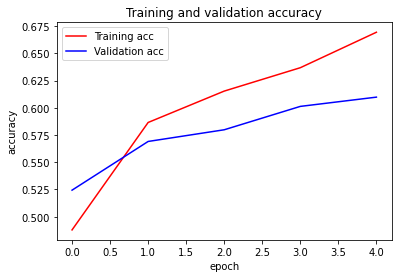

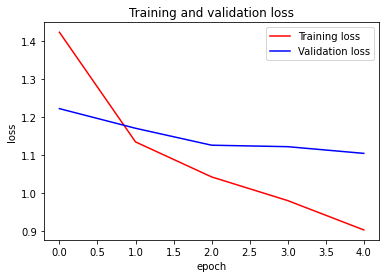

70/70 [==============================] - 4s 59ms/step - loss: 1.1475 - acc: 0.5954
Test Loss: 1.147505760192871
Test Accuracy: 0.5954403281211853


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

   affective_individual     0.0000    0.0000    0.0000        86
   infrastucture_damage     0.6434    0.2884    0.3983       319
 injured_or_dead_people     0.0000    0.0000    0.0000        41
missing_or_found_people     0.0000    0.0000    0.0000         5
        not_humantarian     0.6920    0.6855    0.6888       849
         other_relevant     0.7409    0.4948    0.5934       578
       rescue_volunteer     0.5663    0.4647    0.5105       340
         vehicle_damage     0.0000    0.0000    0.0000        19

              micro avg     0.6780    0.4998    0.5754      2237
              macro avg     0.3303    0.2417    0.2739      2237
           weighted avg     0.6319    0.4998    0.5491      2237
            samples avg     0.4998    0.4998    0.4998      2237

Confusion matrix, without normalization


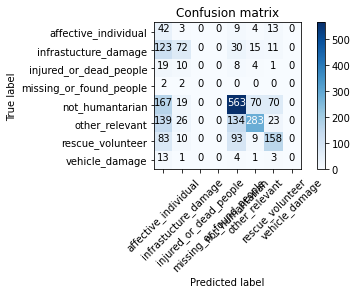

In [47]:
cnn_evaluation(model1, history, xtest_padded_sequences, test_data,test_labels, class_names=None, model_name=None)